In [1]:
# Objective Q1: Importing necessary libraries for data analysis and visualization

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# Objective Q1: Loading the dataset

df = pd.read_csv("/content/rfm_data.csv")
df.head()


,CustomerID,PurchaseDate,TransactionAmount,ProductInformation,OrderID,Location
0,8814,2023-04-11,943.31,Product C,890075,Tokyo
1,2188,2023-04-11,463.70,Product A,176819,London
2,4608,2023-04-11,80.28,Product A,340062,New York
3,2559,2023-04-11,221.29,Product A,239145,London
4,9482,2023-04-11,739.56,Product A,194545,Paris


In [4]:
# Objective Q1: Handling missing values, checking data types, and cleaning dataset

df.info()
df.isnull().sum()

df['PurchaseDate'] = pd.to_datetime(df['PurchaseDate'])
df = df.drop_duplicates()
df = df[df['TransactionAmount'] > 0]


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   CustomerID          1000 non-null   int64         
 1   PurchaseDate        1000 non-null   datetime64[ns]
 2   TransactionAmount   1000 non-null   float64       
 3   ProductInformation  1000 non-null   object        
 4   OrderID             1000 non-null   int64         
 5   Location            1000 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 47.0+ KB


In [5]:
# Objective Q2: Defining reference date for Recency calculation

reference_date = df['PurchaseDate'].max() + pd.Timedelta(days=1)


In [6]:
# Objective Q2: Calculating Recency, Frequency, and Monetary values

rfm = df.groupby('CustomerID').agg({
    'PurchaseDate': lambda x: (reference_date - x.max()).days,
    'OrderID': 'nunique',
    'TransactionAmount': 'sum'
}).reset_index()

rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']
rfm.head()


,CustomerID,Recency,Frequency,Monetary
0,1011,34,2,1129.02
1,1025,22,1,359.29
2,1029,1,1,704.99
3,1046,44,1,859.82
4,1049,14,1,225.72


In [7]:
# Objective Q3: Assigning quantile-based RFM scores

rfm['R_Score'] = pd.qcut(rfm['Recency'], 5, labels=[5,4,3,2,1])
rfm['F_Score'] = pd.qcut(rfm['Frequency'].rank(method='first'), 5, labels=[1,2,3,4,5])
rfm['M_Score'] = pd.qcut(rfm['Monetary'], 5, labels=[1,2,3,4,5])


In [8]:
# Objective Q4: Combining RFM scores to create customer segments

rfm['RFM_Score'] = (
    rfm['R_Score'].astype(str) +
    rfm['F_Score'].astype(str) +
    rfm['M_Score'].astype(str)
)


In [9]:
# Objective Q4: Function to assign customer segment based on RFM score

def assign_segment(row):
    """
    This function categorizes customers into segments
    based on their combined RFM score.
    """
    if row['RFM_Score'] >= '455':
        return 'Champions'
    elif row['RFM_Score'] >= '445':
        return 'Loyal Customers'
    elif row['RFM_Score'] >= '344':
        return 'Potential Loyalists'
    elif row['RFM_Score'] >= '244':
        return 'At Risk'
    else:
        return 'Lost Customers'

rfm['Segment'] = rfm.apply(assign_segment, axis=1)


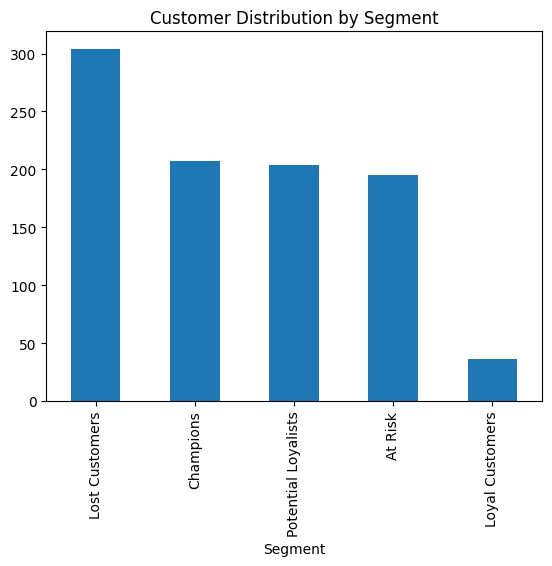

In [10]:
# Objective Q5: Visualizing customer distribution across segments

rfm['Segment'].value_counts().plot(kind='bar')
plt.title("Customer Distribution by Segment")
plt.show()


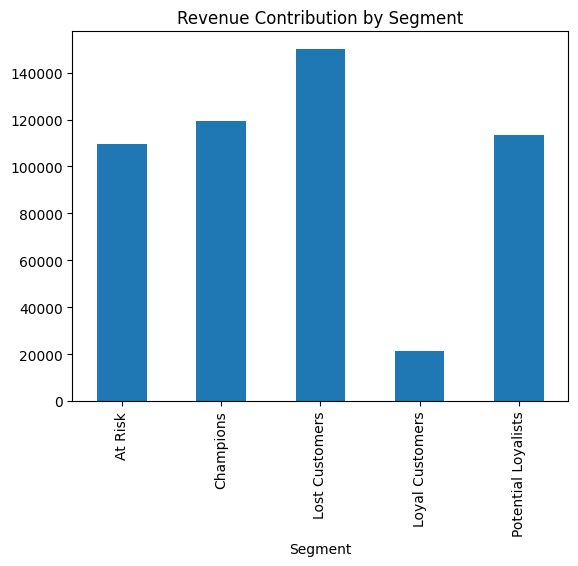

In [11]:
# Objective Q6: Visualizing revenue contribution by segment

rfm.groupby('Segment')['Monetary'].sum().plot(kind='bar')
plt.title("Revenue Contribution by Segment")
plt.show()


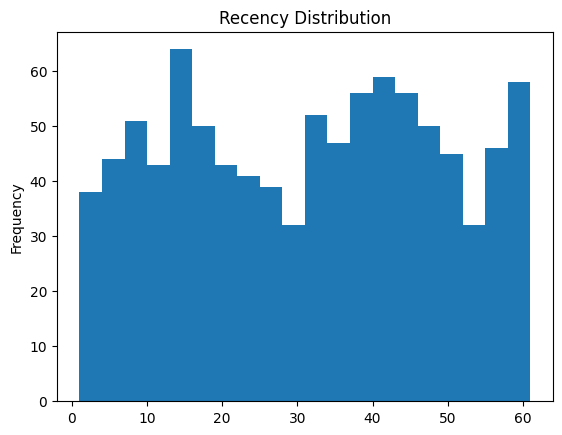

In [12]:
# Objective Q7: Visualizing Recency distribution

rfm['Recency'].plot(kind='hist', bins=20)
plt.title("Recency Distribution")
plt.show()


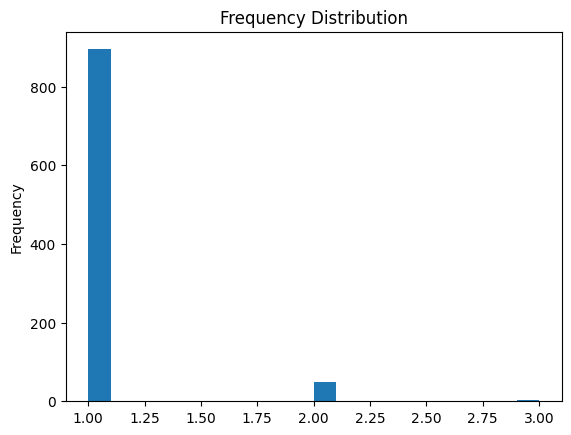

In [13]:
# Objective Q8: Visualizing Frequency distribution

rfm['Frequency'].plot(kind='hist', bins=20)
plt.title("Frequency Distribution")
plt.show()


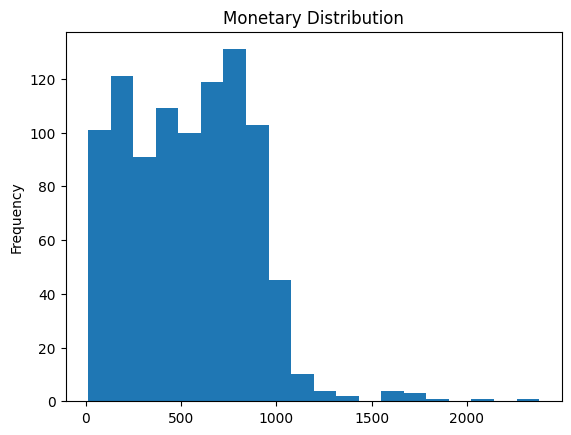

In [14]:
# Objective Q9: Visualizing Monetary distribution

rfm['Monetary'].plot(kind='hist', bins=20)
plt.title("Monetary Distribution")
plt.show()


In [15]:
# Objective Q10: Identifying top segments by customer count

rfm.groupby('Segment')['CustomerID'].count().sort_values(ascending=False)


,CustomerID
Segment,
Lost Customers,304
Champions,207
Potential Loyalists,204
At Risk,195
Loyal Customers,36
